## Ques 1

The data has been merged and added in the files mentioend already(Doesn't Include Merging Code)

In [ ]:

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the CSV data into a DataFrame
df = pd.read_csv('cleaned_data_without_nonempty_gini_final.csv')


# Define the independent variable X and the dependent variable y
X = df[['gdp']]
y = df['residualsodiumcarbonate']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.017
Model:                                 OLS   Adj. R-squared:                  0.017
Method:                      Least Squares   F-statistic:                     87.70
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           1.11e-20
Time:                             08:39:54   Log-Likelihood:                -18954.
No. Observations:                     5130   AIC:                         3.791e+04
Df Residuals:                         5128   BIC:                         3.792e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [ ]:
#####   REGRESSION AFTER REMOVING OUTLIERS   ##########


import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the CSV file into a DataFrame
df1 = pd.read_csv('cleaned_data_without_nonempty_gini_final.csv')

# Enhance the model to include a squared term for GDP
df1['gdp_square'] = df1['gdp'] ** 2
df1['gdp_cube'] = df1['gdp'] ** 3

# Define the independent variables (GDP, its squared term, and Gini) and the dependent variable (residualsodiumcarbonate)
X = df1[['gdp']]
y = df1['residualsodiumcarbonate']

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the initial regression model
initial_model = sm.OLS(y, X).fit()

# Detect outliers using studentized residuals
studentized_residuals = initial_model.get_influence().resid_studentized_internal
outliers_indices = np.abs(studentized_residuals) > 3  # Using a threshold of 3 for studentized residuals

# Remove outliers
cleaned_df = df1[~outliers_indices]

# Define the independent variables and dependent variable for the cleaned data
X_cleaned = cleaned_df[['gdp']]
y_cleaned = cleaned_df['residualsodiumcarbonate']

# Add constant to the independent variables (for intercept)
X_cleaned = sm.add_constant(X_cleaned)

# Fit the regression model to the cleaned data
cleaned_model = sm.OLS(y_cleaned, X_cleaned).fit()

# Summarize the cleaned regression results
print("Regression Results without Outliers:")
print(cleaned_model.summary())





Regression Results without Outliers:
                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.045
Model:                                 OLS   Adj. R-squared:                  0.045
Method:                      Least Squares   F-statistic:                     239.3
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           8.49e-53
Time:                             08:39:58   Log-Likelihood:                -15492.
No. Observations:                     5116   AIC:                         3.099e+04
Df Residuals:                         5114   BIC:                         3.100e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

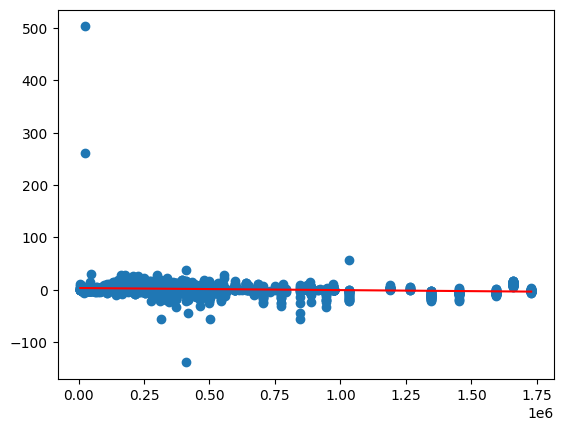

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading data from the csv
data = pd.read_csv("cleaned_data_without_nonempty_gini_final.csv")

# Clean data and convert to numeric
data['gdp'] = pd.to_numeric(data['gdp'], errors='coerce')
data['residualsodiumcarbonate'] = pd.to_numeric(data['residualsodiumcarbonate'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['gdp', 'residualsodiumcarbonate'], inplace=True)

# plotting the original values
x = data['gdp']
y = data['residualsodiumcarbonate']
plt.scatter(x, y)

# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = x.max()
min_x = x.min()

# range of values for plotting
# the regression line
x_values = np.arange(min_x, max_x, 1)

# the substituted equation
y_values =  -3.946e-06 * x_values +  3.3545

# plotting the regression line
plt.plot(x_values, y_values, 'r')
plt.show()

## Ques 2

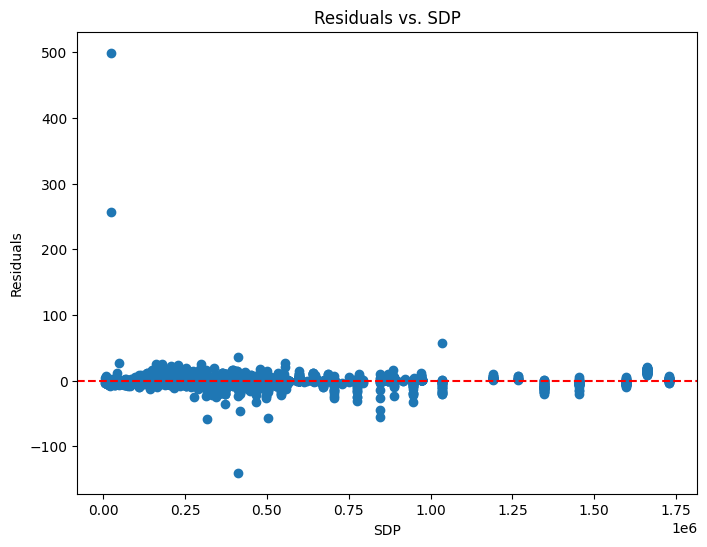

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X)
# Calculate residuals
residuals = y.values - predictions

# Plot residuals vs. SDP
plt.figure(figsize=(8, 6))
plt.scatter(X['gdp'], residuals)
plt.xlabel('SDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. SDP')

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.show()



## WE get the data as per what we expect this is because the residual is around the line y = 0 which shows that the covariance between residuals and sdp is 0.

# Ques 3

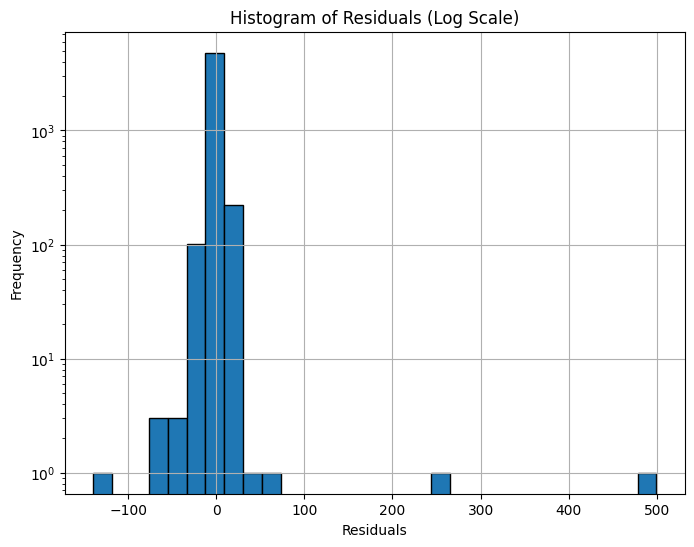

Sum of residuals: -1.490230161493855e-11


In [ ]:
## Q3.
import matplotlib.pyplot as plt

# Plot histogram of residuals with log scale on y-axis
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.yscale('log')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Log Scale)')
plt.grid(True)
plt.show()

# Verify that the sum of residuals is approximately zero
sum_residuals = sum(residuals)
print("Sum of residuals:", sum_residuals)


### This code will plot a histogram of the residuals with a logarithmic scale on the y-axis, ensuring that very small values are visible.


# Ques 4

In [ ]:
### Q4

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Load the CSV file into a DataFrame
df1 = pd.read_csv('cleaned_data_without_nonempty_gini.csv')

# Enhance the model to include a squared term for GDP
df1['gdp_square'] = df1['gdp']**2
df1['gdp_cube'] = df1['gdp']**3

# Define the independent variables (GDP, its squared term, and Gini) and the dependent variable (residualsodiumcarbonate)
X = df1[['gdp', 'gdp_square','gdp_cube','Gini']]

y = df1['residualsodiumcarbonate']

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summarize the regression results
print(model.summary())

# Summary statistics table
summary_table = df1.describe().transpose()
print("\nSummary Statistics Table:")
print(summary_table)

                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.017
Model:                                 OLS   Adj. R-squared:                  0.017
Method:                      Least Squares   F-statistic:                     41.87
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           9.32e-19
Time:                             08:42:08   Log-Likelihood:                -18033.
No. Observations:                     4843   AIC:                         3.607e+04
Df Residuals:                         4840   BIC:                         3.609e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Enhancing the model**


---


adding parameter of **gdp_gini**

In [ ]:

import pandas as pd
import statsmodels.api as sm

# Load the CSV file into a DataFrame
df1 = pd.read_csv('cleaned_data_without_nonempty_gini_final.csv')

# Enhance the model to include squared and cubed terms for GDP
df1['gdp_square'] = df1['gdp']**2
df1['gdp_cube'] = df1['gdp']**3
df1['gdp_gini'] = df1['gdp'] * df1['Gini']

# Define the independent variables (GDP, its squared term, and Gini) and the dependent variable (residualsodiumcarbonate)
X = df1[['gdp', 'gdp_square', 'gdp_cube','gdp_gini', 'Gini']]
y = df1['residualsodiumcarbonate']

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summarize the regression results
print(model.summary())

# Summary statistics table
summary_table = df1.describe().transpose()
print("\nSummary Statistics Table:")
print(summary_table)

                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.023
Model:                                 OLS   Adj. R-squared:                  0.023
Method:                      Least Squares   F-statistic:                     41.02
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           3.45e-26
Time:                             08:41:11   Log-Likelihood:                -18936.
No. Observations:                     5130   AIC:                         3.788e+04
Df Residuals:                         5126   BIC:                         3.791e+04
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

# **Interpretation**


---


A low R-squared (R^2) value doesn't always indicate no relationship or a poor fit between the independent and dependent variables. Here are some reasons for a low R^2:

- **Non-linearity**: The relationship may be non-linear, which a linear model cannot capture well.
- **Noisy Data**: High variability or noise in the data can make it difficult for the model to explain the variance.
- **Missing Variables**: Not including important variables in the model can lead to lower explained variance.
- **Heteroscedasticity**: Variable variance across levels of the independent variables can reduce R^2.
- **Outliers**: Outliers can greatly influence the fit of the model and decrease R^2.

Thus, while a low R^2 suggests limited variance explained by the model, it doesn't necessarily imply no relationship or poor model performance. Additional diagnostics and analyses are needed for a comprehensive evaluation.


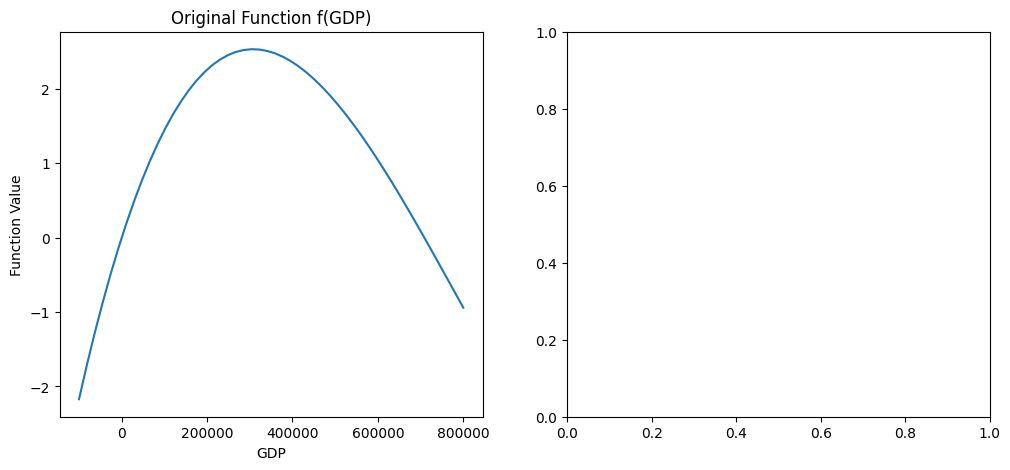

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(GDP):
    return 9.95e-11 + 1.793e-05 * GDP + -3.629e-11* GDP**2 + 1.551e-17* GDP**3

GDP_range = np.linspace(-100000, 800000)
y1 = [f(x) for x in GDP_range]


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(GDP_range, y1)
ax[0].set_title('Original Function f(GDP)')
ax[0].set_xlabel('GDP')
ax[0].set_ylabel('Function Value')

plt.show()


# 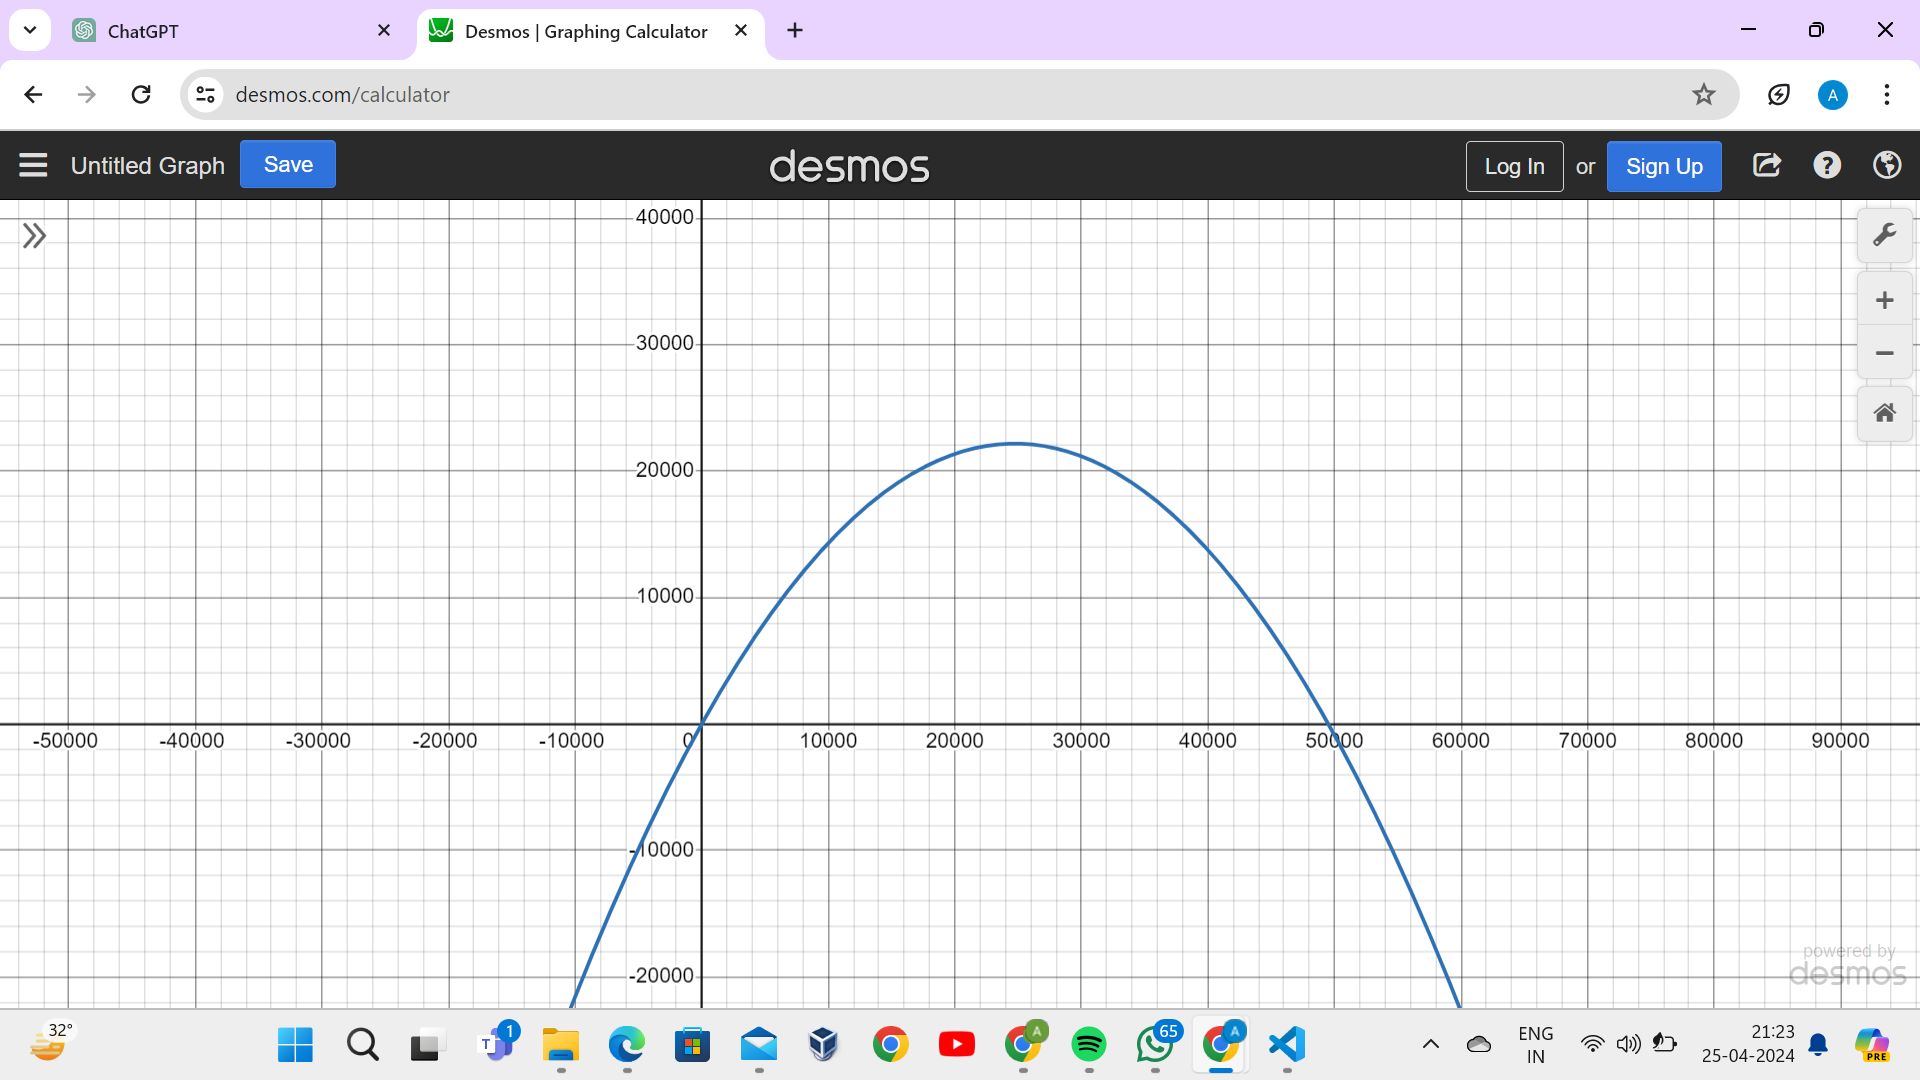







THIS IS THE SCALED GRAPH FOR THE SAME AND GIVES CORRECT OUTPUT THAT IS THE KUZNET CURVE FIST RISES THEN SATURATES AND FINALLY DECREASES

The value of GDP for which the value of kuznet curve saturates is  
3,682,215.25



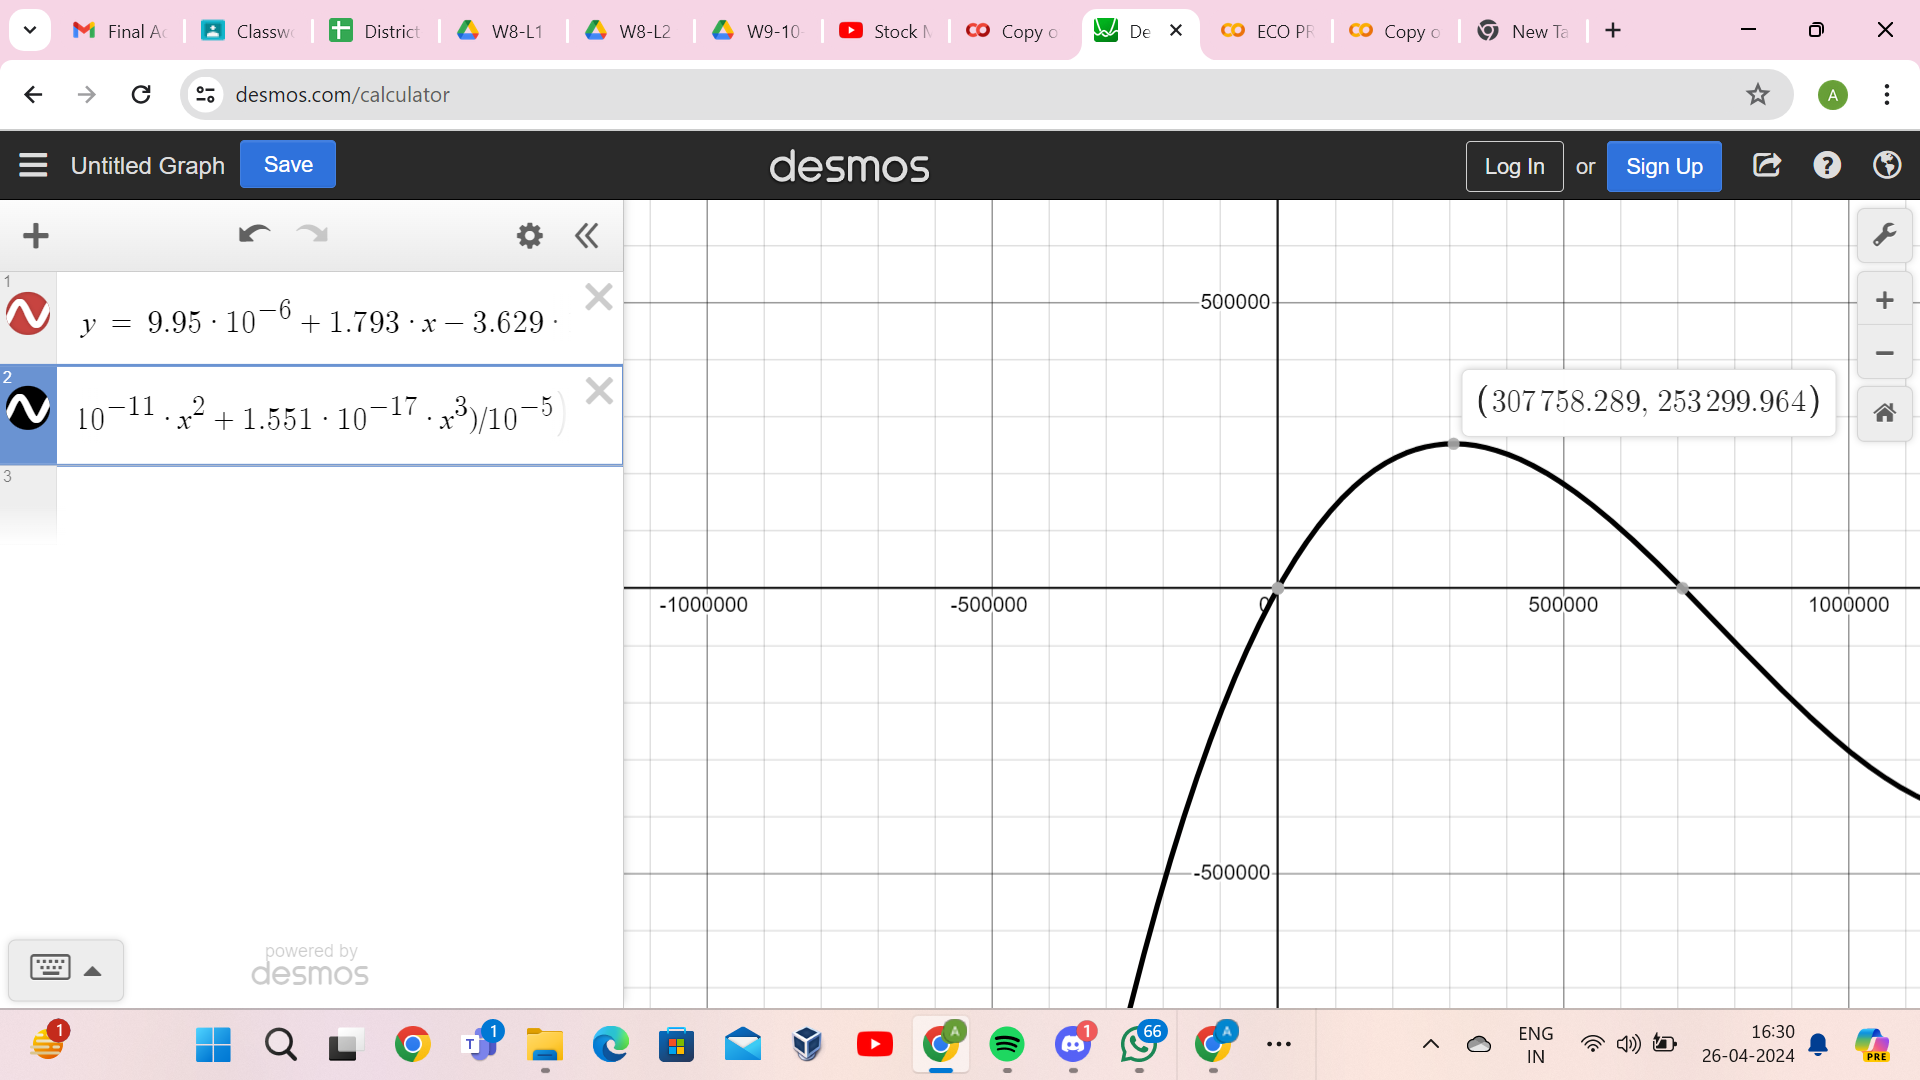



WE HAVE SCALED THE VALUES ON THE RHS BY DIVIDING THEM BY 10^-5 SO THAT WE COULD OPLOT THE GRAPH IN A BETTER WAY BUT THE SHAPE OF THE GRAPH STILL REMAINS THE SAME.


THIS IS THE SCALED GRAPH FOR THE SAME AND GIVES CORRECT OUTPUT THAT IS THE KUZNET CURVE FIST RISES THEN SATURATES AND FINALLY DECREASES FOR THE PORTION WHERE MOST OF OUR VALUES ARE LYING.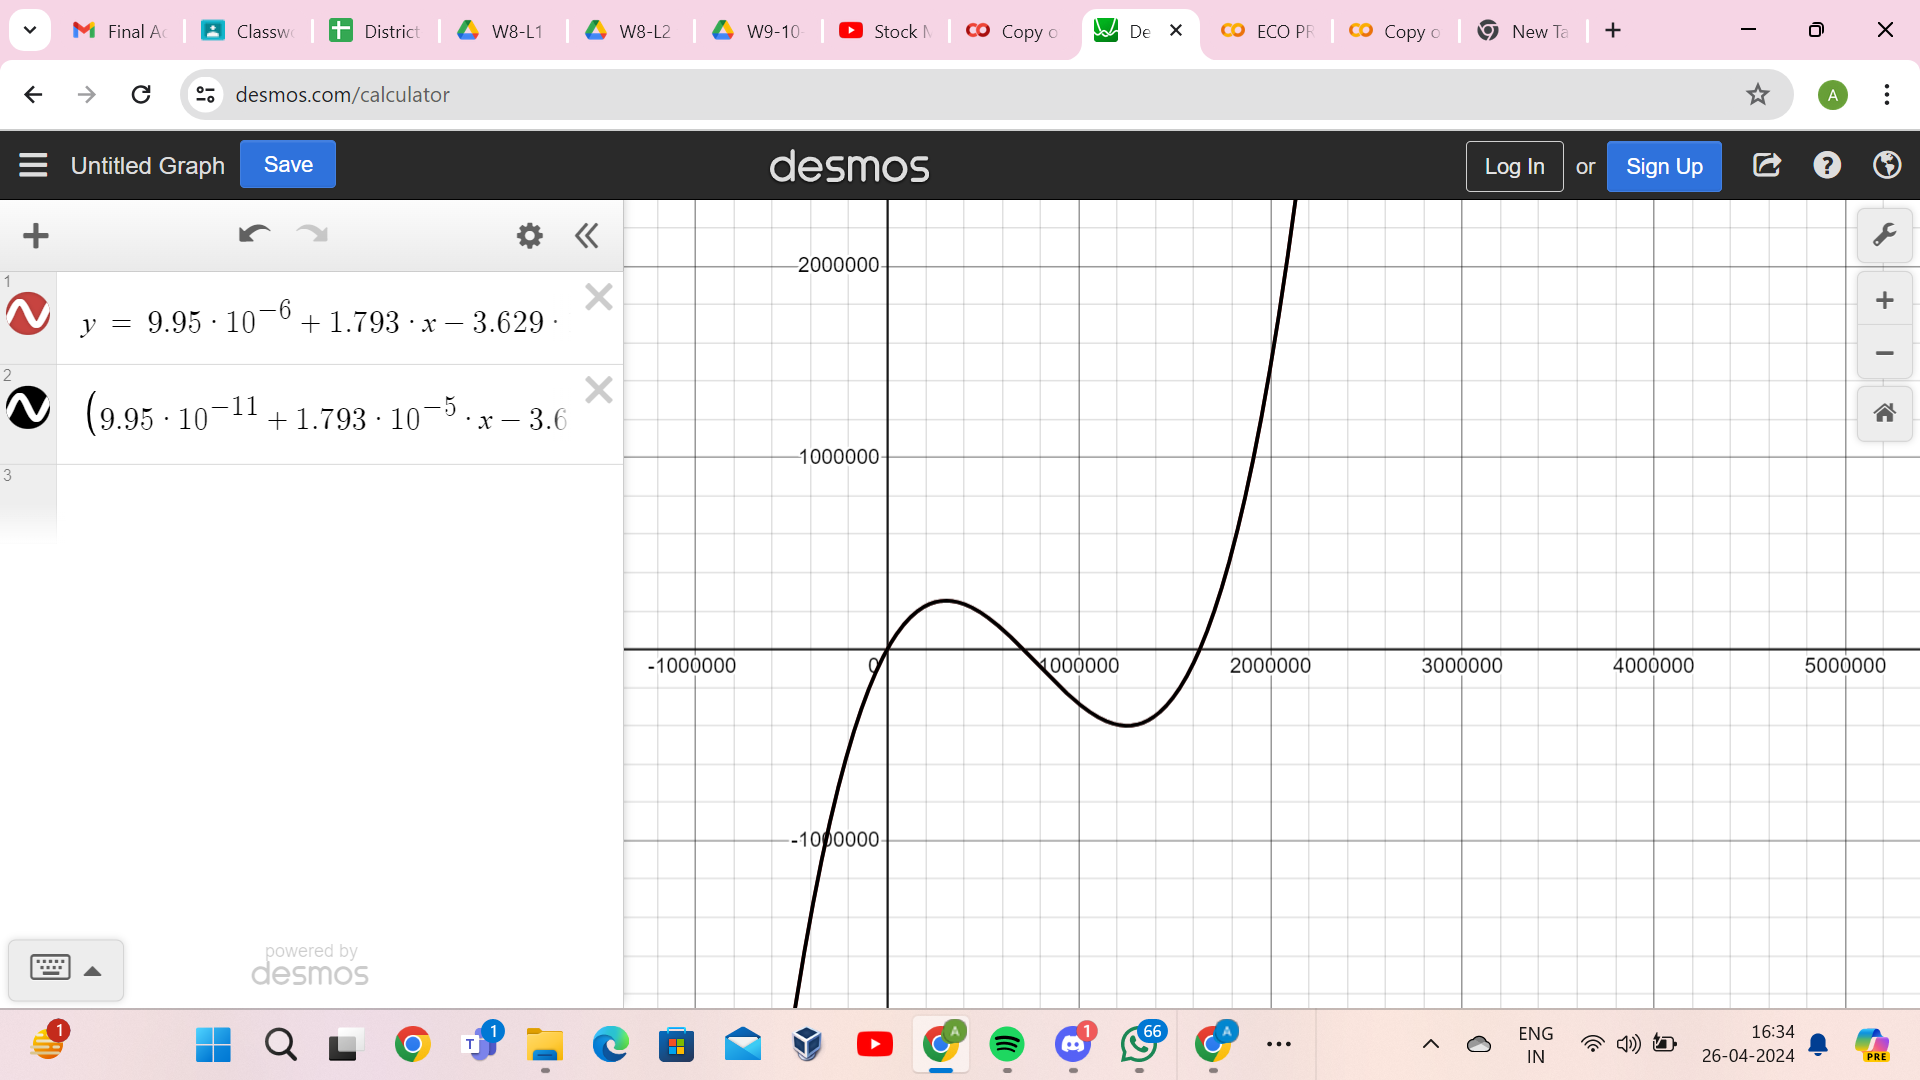





THIS IS THE ACTUAL SHAPE OF THE GRAPH

# FINDING OUTLIERS AND INFLUENTIAL OBSERVATIONS
## Identifying Outliers and Influential Observations in OLS Model

1. **Residual Analysis**:
   - Plot the residuals against the fitted values. Outliers often show up as points with large residuals.
   - Look for patterns in the residuals. Random scatter indicates model assumptions are likely met.

2. **Leverage**:
   - Calculate leverage for each observation. High leverage values indicate extreme values on independent variables.

4. **DFBETAS**:
   - Measures change in coefficients when an observation is excluded.
   - DFBETAS values greater than threshold are considered influential.

5. **DFITS**:
   - Measures influence of each observation on predicted values.
   - Observations with high DFITS values are influential.

6. **Studentized Residuals**:
   - Residuals divided by their standard errors.
   - Observations with studentized residuals greater than threshold are potential outliers.

7. **Visualization**:
   - Boxplots, scatterplots can help visually identify outliers and influential observations.

Remember to interpret these findings in context and consider further investigation rather than simply removing data points.


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Load the CSV file into a DataFrame
df1 = pd.read_csv('cleaned_data_without_nonempty_gini.csv')

# Enhance the model to include a squared term for GDP
df1['gdp_square'] = df1['gdp']**2
df1['gdp_cube'] = df1['gdp']**3

# Define the independent variables (GDP, its squared term, and Gini) and the dependent variable (residualsodiumcarbonate)
X = df1[['gdp', 'gdp_square','gdp_cube','Gini']]

y = df1['residualsodiumcarbonate']

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summarize the regression results
print(model.summary())

# Summary statistics table
summary_table = df1.describe().transpose()
print("\nSummary Statistics Table:")
print(summary_table)

# Detect outliers using studentized residuals
studentized_residuals = model.get_influence().resid_studentized_internal
outliers = df1[abs(studentized_residuals) > 3]  # Using a threshold of 3 for studentized residuals
print("\nOutliers:")
print(outliers)

# How to tackle outliers:
# - Consider removing or transforming the data points causing the outliers,
#   after careful examination of their nature and potential impact on the analysis.

# Calculate influential observations using leverage values, Cook's distance, and DFBETAS
influence = OLSInfluence(model)
leverage = influence.hat_matrix_diag
cook_distance = influence.cooks_distance[0]
dfbetas = influence.dfbetas

print("Shape of dfbetas:", dfbetas.shape)
print("Shape of X:", X.shape)

import numpy as np
# Calculate influential observations using leverage values, Cook's distance, and DFBETAS
influence = OLSInfluence(model)
leverage = influence.hat_matrix_diag
cook_distance = influence.cooks_distance[0]
dfbetas_abs = abs(dfbetas)  # Compute absolute values element-wise

# Create an array with the same shape as dfbetas_abs, filled with the scalar value
threshold = 2 / X.shape[0]
threshold_array = np.full(dfbetas_abs.shape, threshold)

# Identify influential observations based on a combination of these metrics
influential_obs_indices = (dfbetas_abs > threshold_array)

# Print influential observations
influential_obs = df1[influential_obs_indices]
print("\nInfluential Observations:")
print(influential_obs)


# How to tackle influential observations:
# - Assess the impact of these observations on the regression coefficients and model fit.
# - Consider re-estimating the model with and without influential observations to evaluate their effect.


                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.017
Model:                                 OLS   Adj. R-squared:                  0.017
Method:                      Least Squares   F-statistic:                     41.87
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           9.32e-19
Time:                             08:34:40   Log-Likelihood:                -18033.
No. Observations:                     4843   AIC:                         3.607e+04
Df Residuals:                         4840   BIC:                         3.609e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

Running Regression without **OUTLIERS**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the CSV file into a DataFrame
df1 = pd.read_csv('cleaned_data_without_nonempty_gini_final.csv')

# Enhance the model to include a squared term for GDP
df1['gdp_square'] = df1['gdp'] ** 2
df1['gdp_cube'] = df1['gdp'] ** 3

# Define the independent variables (GDP, its squared term, and Gini) and the dependent variable (residualsodiumcarbonate)
X = df1[['gdp', 'gdp_square', 'gdp_cube', 'Gini']]
y = df1['residualsodiumcarbonate']

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the initial regression model
initial_model = sm.OLS(y, X).fit()

# Detect outliers using studentized residuals
studentized_residuals = initial_model.get_influence().resid_studentized_internal
outliers_indices = np.abs(studentized_residuals) > 3  # Using a threshold of 3 for studentized residuals

# Remove outliers
cleaned_df = df1[~outliers_indices]

# Define the independent variables and dependent variable for the cleaned data
X_cleaned = cleaned_df[['gdp', 'gdp_square', 'gdp_cube', 'Gini']]
y_cleaned = cleaned_df['residualsodiumcarbonate']

# Add constant to the independent variables (for intercept)
X_cleaned = sm.add_constant(X_cleaned)

# Fit the regression model to the cleaned data
cleaned_model = sm.OLS(y_cleaned, X_cleaned).fit()

# Summarize the cleaned regression results
print("Regression Results without Outliers:")
print(cleaned_model.summary())


Regression Results without Outliers:
                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.072
Model:                                 OLS   Adj. R-squared:                  0.071
Method:                      Least Squares   F-statistic:                     197.2
Date:                     Sun, 28 Apr 2024   Prob (F-statistic):           3.22e-83
Time:                             10:00:01   Log-Likelihood:                -15401.
No. Observations:                     5115   AIC:                         3.081e+04
Df Residuals:                         5112   BIC:                         3.083e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

# Ques 5

done along with question 4

# Ques 6

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

Region=[]
df1 = pd.read_csv('cleaned_data_without_nonempty_gini_final.csv')
df1['gdp_square'] = df1['gdp']**2
df1['gdp_cube'] = df1['gdp']**3

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read the CSV data
df1 = pd.read_csv('/content/cleaned_data_without_nonempty_gini.csv')

# Add squared and cubed GDP terms
df1['gdp_square'] = df1['gdp']**2
df1['gdp_cube'] = df1['gdp']**3

# Group data by year
grouped_data = df1.groupby('year')

# Store regression results
results = []



# Loop through each year, fit the regression model, and store the results
for year, group in grouped_data:
    X = group[['gdp', 'gdp_square', 'gdp_cube', 'Gini']]
    y = group['residualsodiumcarbonate']

    # Add constant to the independent variables (for intercept)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    results.append({'Year': year, 'Model': model})
    # For
for res in results:
    print(f"Regression results for year: {res['Year']}")
    print(res['Model'].summary())
    print("\n")


Regression results for year: 2000
                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.129
Model:                                 OLS   Adj. R-squared:                  0.121
Method:                      Least Squares   F-statistic:                     15.20
Date:                     Sun, 28 Apr 2024   Prob (F-statistic):           6.97e-07
Time:                             19:02:54   Log-Likelihood:                -530.87
No. Observations:                      208   AIC:                             1068.
Df Residuals:                          205   BIC:                             1078.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [ ]:
summary_table = df1.describe().transpose()
print("\nSummary Statistics Table:")
print(summary_table)


Summary Statistics Table:
                          count          mean           std           min  \
year                     5130.0  2.009921e+03  5.276910e+00  2.000000e+03   
residualsodiumcarbonate  5130.0  1.917373e+00  9.819184e+00 -1.383800e+02   
gdp                      5130.0  3.647219e+05  3.220616e+05  6.734071e+03   
Gini                     5130.0  3.141189e-01  4.613903e-02  1.700000e-01   
gdp_square               5130.0  2.367255e+11  4.793223e+11  4.534771e+07   
gdp_cube                 5130.0  2.311004e+17  7.384538e+17  3.053747e+11   
Kuznets_Curve            5130.0  1.199393e+05  1.186024e+05  1.495970e+03   

                                  25%           50%           75%  \
year                     2.006000e+03  2.010000e+03  2.014000e+03   
residualsodiumcarbonate  0.000000e+00  1.442500e+00  4.018571e+00   
gdp                      1.653542e+05  2.592302e+05  4.621817e+05   
Gini                     2.900000e-01  3.100000e-01  3.500000e-01   
gdp_square 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the CSV data
df1 = pd.read_csv('/content/cleaned_data_without_nonempty_gini.csv')

# Add squared and cubed GDP terms
df1['gdp_square'] = df1['gdp'] ** 2
df1['gdp_cube'] = df1['gdp'] ** 3


grouped_data = df1.groupby('year')
var = ['gdp', 'gdp_square', 'gdp_cube', 'Gini']

for i in var:
  print(i)
  print(df1[i].mean())
  print(df1[i].median())
  print(df1[i].std())
  print('\n')


gdp
364721.8782187478
259230.1691
322061.59082276473


gdp_square
236725497696.04926
67200280571.61459
479322282505.05084


gdp_cube
2.3110043843423958e+17
1.7420340096147096e+16
7.384538079278383e+17


Gini
0.3141189083820663
0.31
0.04613903109373301




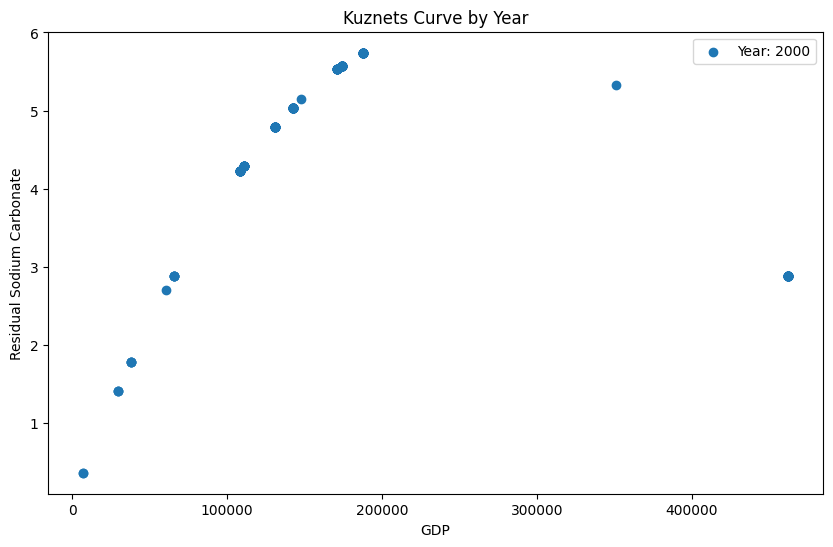

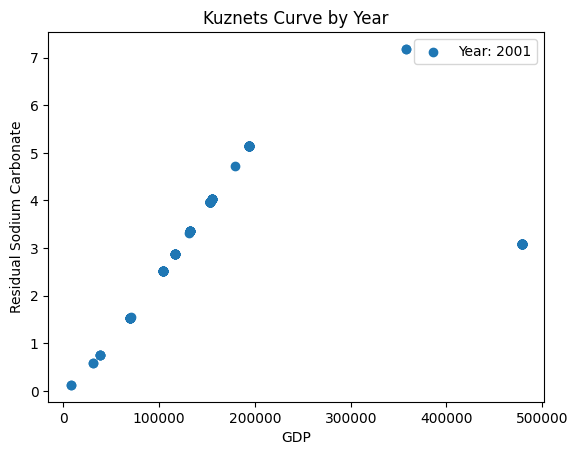

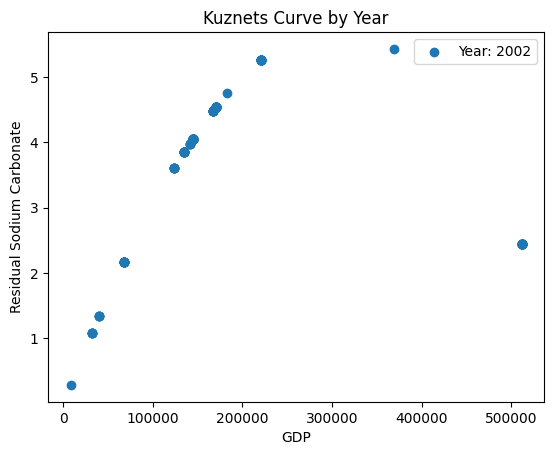

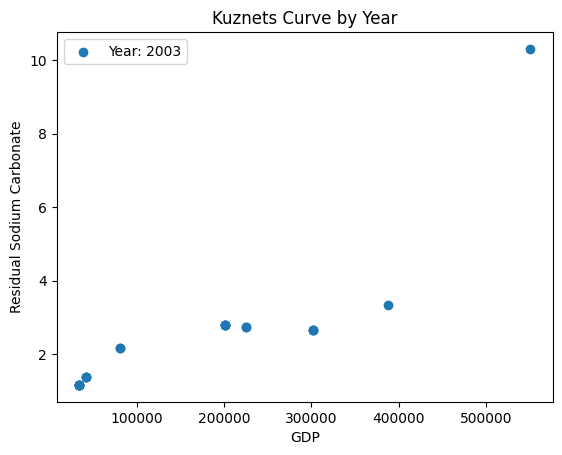

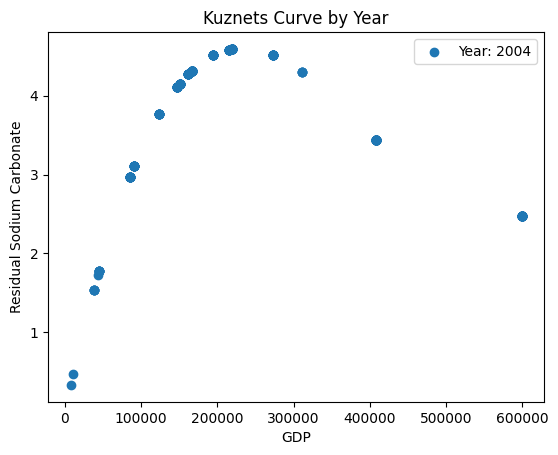

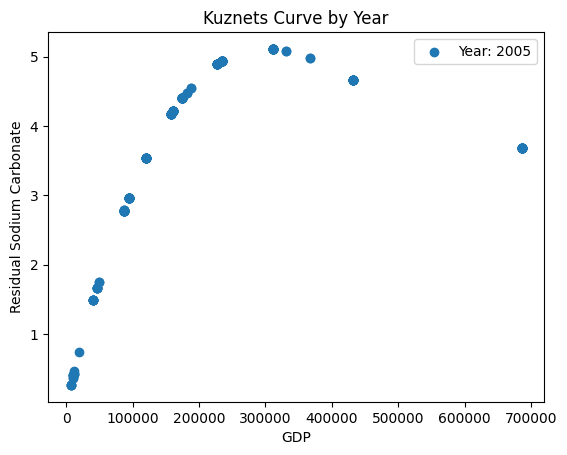

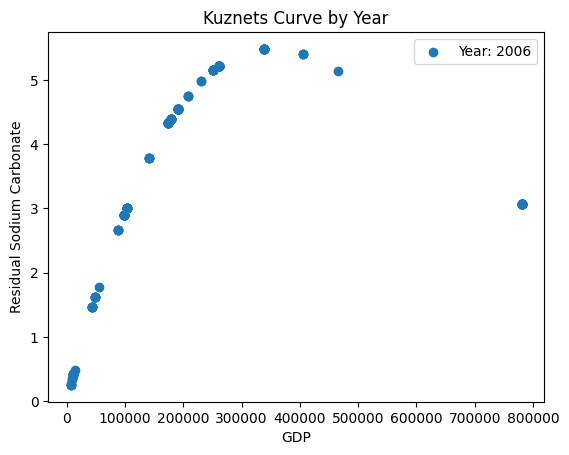

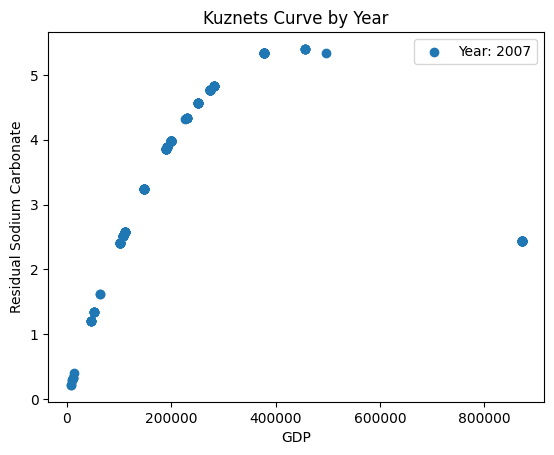

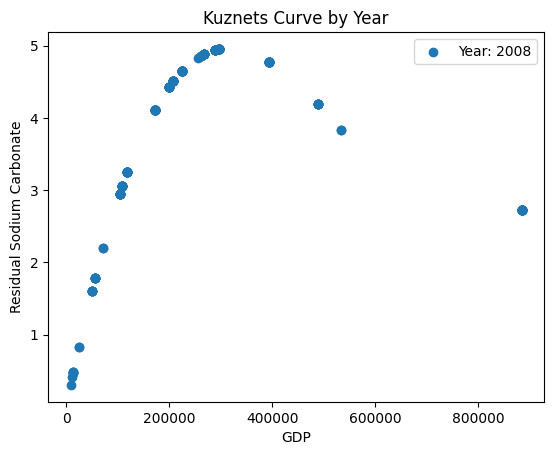

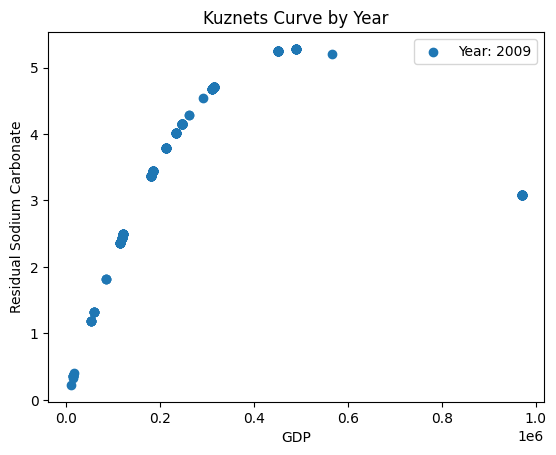

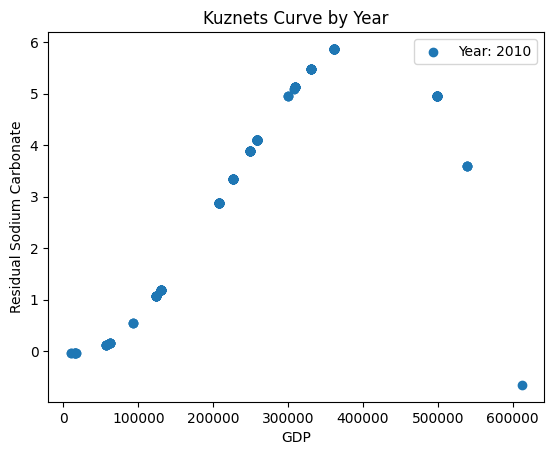

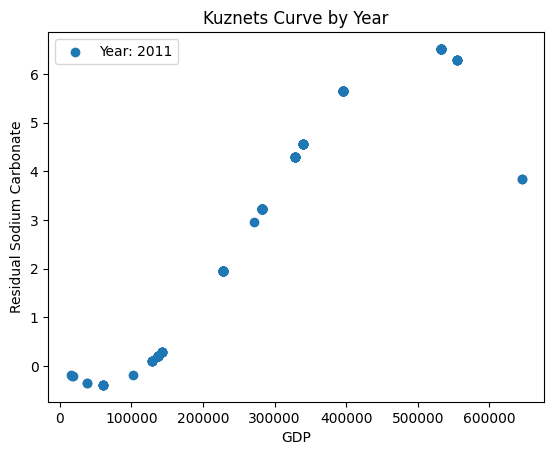

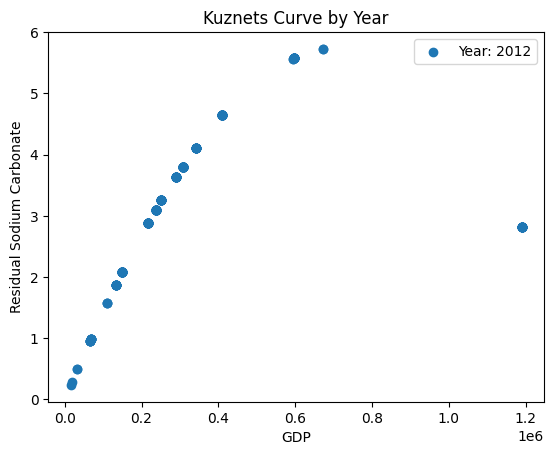

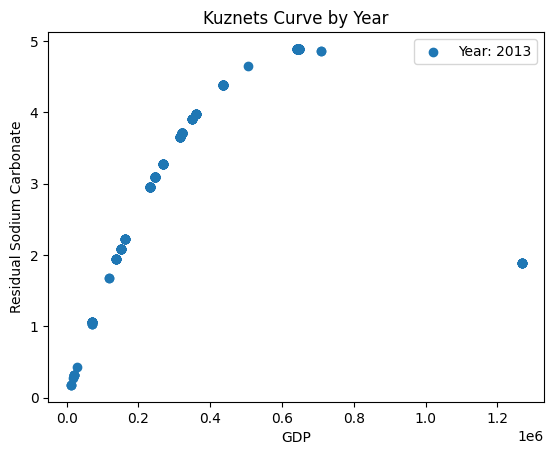

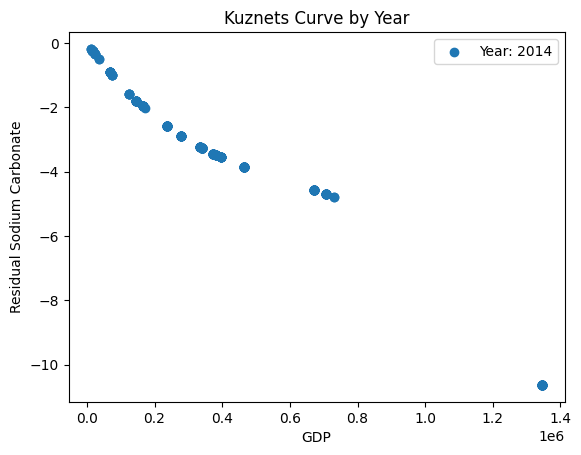

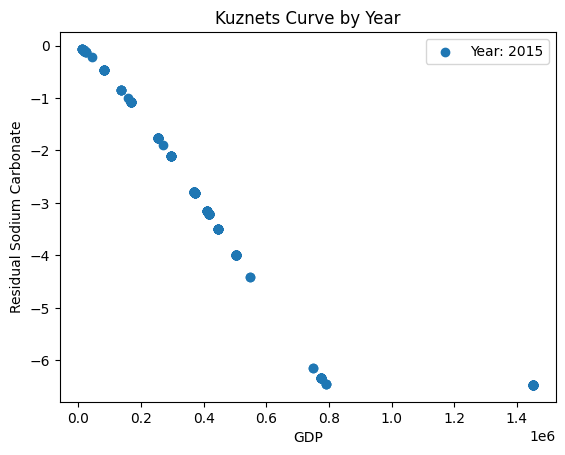

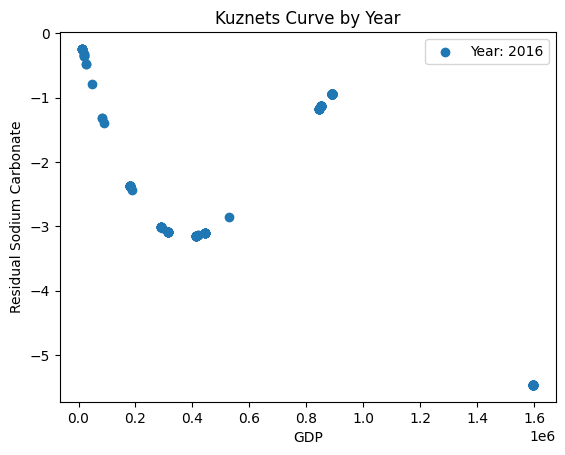

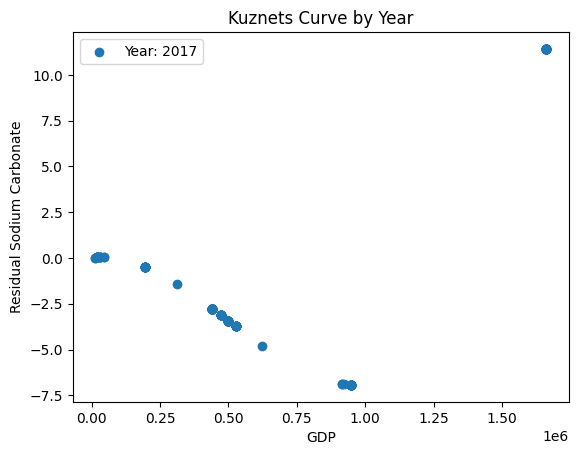

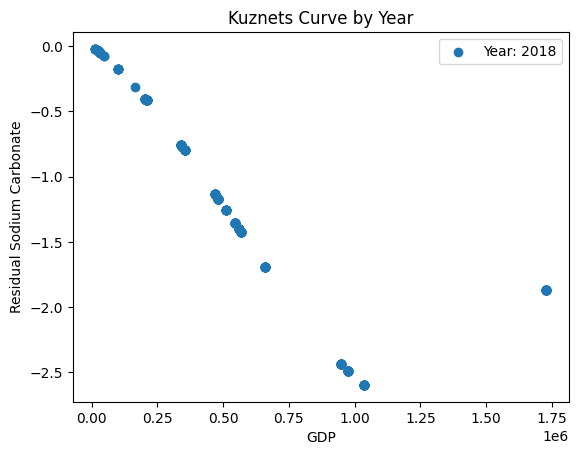

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the CSV data
df1 = pd.read_csv('/content/cleaned_data_without_nonempty_gini.csv')

# Add squared and cubed GDP terms
df1['gdp_square'] = df1['gdp'] ** 2
df1['gdp_cube'] = df1['gdp'] ** 3


grouped_data = df1.groupby('year')

plt.figure(figsize=(10, 6))



for year, group in grouped_data:
    # Fit a regression model
    model = sm.OLS(group['residualsodiumcarbonate'], sm.add_constant(group[['gdp', 'gdp_square', 'gdp_cube', 'Gini']]))
    results = model.fit()

    # Extract coefficients
    coef_gdp, coef_gdp_square, coef_gdp_cube, coef_gini = results.params[1:]
    intercept = results.params[0]

    # Calculate predicted values
    predicted_y = intercept + coef_gdp * group['gdp'] + coef_gdp_square * group['gdp'] ** 2 + coef_gdp_cube * group['gdp'] ** 3 + coef_gini * group['Gini']

    # Plot actual data points and Kuznets curve
    plt.scatter(group['gdp'], predicted_y, label=f'Year: {year}')

    plt.xlabel('GDP')
    plt.ylabel('Residual Sodium Carbonate')
    plt.title('Kuznets Curve by Year')
    plt.legend()
    plt.show()


<ipython-input-7-3ce58bd0e79e>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')  # Choose a colormap (adjust as needed)
<ipython-input-7-3ce58bd0e79e>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(avg_gdp, predicted_value, label=f'Year: {year}', c=colors[i])


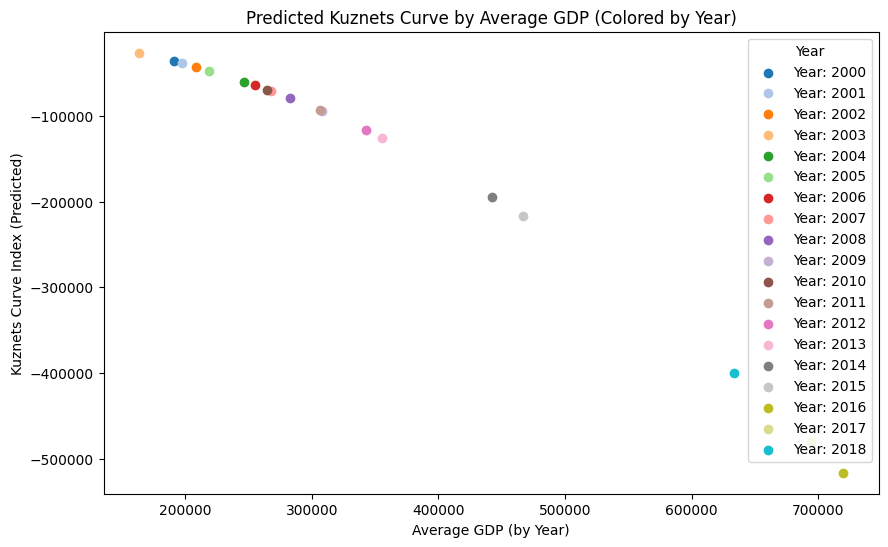

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap library

# Read the CSV data
df1 = pd.read_csv('cleaned_data_without_nonempty_gini.csv')

# Calculate Kuznets Curve Index (assuming gini is already present)
df1['Kuznets_Curve'] = df1['gdp'] * df1['Gini']

# Group data by year and calculate average gdp
grouped_data = df1.groupby('year')['gdp'].mean()

# Function to calculate Kuznets Curve based on average GDP
def kuznets_curve_eqn(avg_gdp):
  # Replace this with your actual Kuznets Curve equation coefficients
  # (e.g., a + b*avg_gdp + c*avg_gdp**2)
  return 0.1 + 0.002 * avg_gdp - 0.000001 * avg_gdp**2  # Placeholder equation, adjust coefficients

# Calculate predicted Kuznets Curve values for each year's average GDP
predicted_curve = grouped_data.apply(kuznets_curve_eqn)

# Create a colormap for assigning colors to years
cmap = cm.get_cmap('tab20')  # Choose a colormap (adjust as needed)
num_years = len(grouped_data)  # Number of years (data points)

# Create a list of colors based on the colormap
colors = cmap(range(num_years))  # Assign colors for each year

plt.figure(figsize=(10, 6))
for i, (year, avg_gdp) in enumerate(grouped_data.items()):
  predicted_value = predicted_curve.iloc[i]  # Get predicted value for this year
  plt.scatter(avg_gdp, predicted_value, label=f'Year: {year}', c=colors[i])

plt.xlabel('Average GDP (by Year)')
plt.ylabel('Kuznets Curve Index (Predicted)')
plt.title('Predicted Kuznets Curve by Average GDP (Colored by Year)')
plt.legend(title='Year')
plt.show()


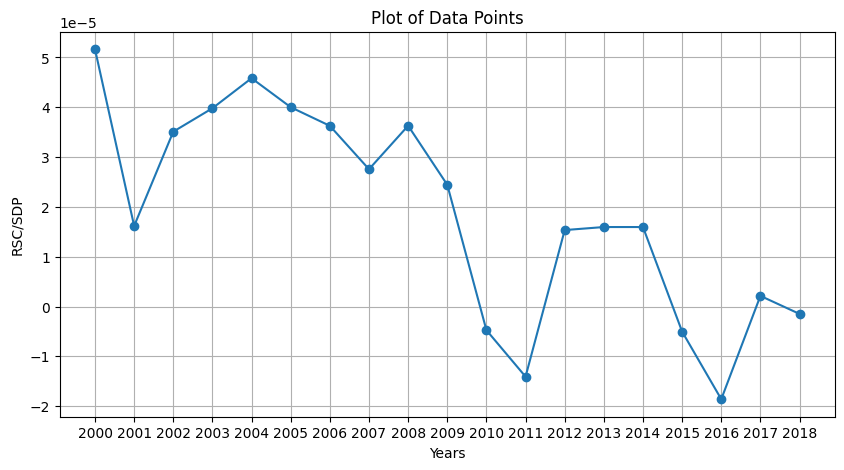

In [ ]:
import matplotlib.pyplot as plt

# Data
values = [
    5.166e-05, 1.618e-05, 3.511e-05, 3.981e-05, 4.584e-05,
    4.002e-05, 3.628e-05, 2.757e-05, 3.63e-05, 2.444e-05,
    -4.745e-06, -1.408e-05, 1.535e-05, 1.596e-05, 1.596e-05,
    -5.036e-06, -1.861e-05, 2.134e-06, -1.483e-06
]
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(years, values, marker='o', linestyle='-')  # Plot values directly

# Set the x-axis ticks and labels manually using the 'years' list
plt.xticks(years, years)  # Set x-axis tick positions and labels

plt.title('Plot of Data Points')
plt.ylabel('RSC/SDP')
plt.xlabel('Years')
plt.grid(True)
plt.show()


# Ques 7

In [ ]:
def state_to_region(state):
  region_mapping = {
        'andaman and nicobar islands': 'EASTERN REGION',
        'andhra pradesh': 'SOUTHERN REGION',
        'arunachal pradesh': 'NORTH-EASTERN REGION',
        'assam': 'NORTH-EASTERN REGION',
        'bihar': 'EASTERN REGION',
        'chandigarh': 'NORTHERN REGION',
        'chhattisgarh': 'CENTRAL REGION',
        'dadra and nagar haveli': 'WESTERN REGION',
        'daman and diu': 'WESTERN REGION',
        'delhi': 'NORTHERN REGION',
        'goa': 'WESTERN REGION',
        'gujarat': 'WESTERN REGION',
        'haryana': 'NORTHERN REGION',
        'himachal pradesh': 'NORTHERN REGION',
        'jammu and kashmir': 'NORTHERN REGION',
        'jharkhand': 'EASTERN REGION',
        'karnataka': 'SOUTHERN REGION',
        'kerala': 'SOUTHERN REGION',
        'lakshadweep': 'SOUTHERN REGION',
        'madhya pradesh': 'CENTRAL REGION',
        'maharashtra': 'WESTERN REGION',
        'manipur': 'NORTH-EASTERN REGION',
        'meghalaya': 'NORTH-EASTERN REGION',
        'mizoram': 'NORTH-EASTERN REGION',
        'nagaland': 'NORTH-EASTERN REGION',
        'orissa': 'EASTERN REGION',
        'pondicherry': 'SOUTHERN REGION',
        'punjab': 'NORTHERN REGION',
        'rajasthan': 'NORTHERN REGION',
        'sikkim': 'EASTERN REGION',
        'tamil nadu': 'SOUTHERN REGION',
        'tripura': 'NORTH-EASTERN REGION',
        'uttar pradesh': 'CENTRAL REGION',
        'uttaranchal': 'CENTRAL REGION',
        'west bengal': 'EASTERN REGION'
  }
  return region_mapping.get(state, None)

print(state_to_region('kerala'))

SOUTHERN REGION


In [ ]:
# Q7

import pandas as pd
import numpy as np
import statsmodels.api as sm

Region=[]
df1 = pd.read_csv('/content/cleaned_data_without_nonempty_gini.csv')
df1['gdp_square'] = df1['gdp']**2
df1['gdp_cube'] = df1['gdp']**3
for i in df1['state']:
    Region.append(state_to_region(i))
df1['Region']=Region

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    5130 non-null   object 
 1   district                 5130 non-null   object 
 2   year                     5130 non-null   int64  
 3   residualsodiumcarbonate  5130 non-null   float64
 4   gdp                      5130 non-null   float64
 5   Gini                     5130 non-null   float64
 6   gdp_square               5130 non-null   float64
 7   gdp_cube                 5130 non-null   float64
 8   Region                   4753 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 360.8+ KB


In [ ]:
df1.head()

,state,district,year,residualsodiumcarbonate,gdp,Gini,gdp_square,gdp_cube,Region
0,andhra pradesh,anantapur,2000,5.265667,171092.8680,0.32,2.927277e+10,5.008362e+15,SOUTHERN REGION
1,andhra pradesh,anantapur,2001,4.532727,178850.9966,0.32,3.198768e+10,5.721028e+15,SOUTHERN REGION
2,andhra pradesh,anantapur,2003,0.000000,200842.5423,0.32,4.033773e+10,8.101532e+15,SOUTHERN REGION
3,andhra pradesh,anantapur,2004,-6.114445,215454.7027,0.32,4.642073e+10,1.000156e+16,SOUTHERN REGION
4,andhra pradesh,anantapur,2005,9.348000,227456.6990,0.32,5.173655e+10,1.176782e+16,SOUTHERN REGION


In [ ]:
import matplotlib.pyplot as plt
df1['Kuznets_Curve'] = df1['gdp'] * df1['Gini']
grouped_data = df1.groupby('Region')
plt.figure(figsize=(10, 6))
for region, group in grouped_data:
    plt.scatter(group['gdp'], group['Kuznets_Curve'], label=region)
plt.xlabel('GDP')
plt.ylabel('Kuznets Curve Index')
plt.title('Kuznets Curve by Region')
plt.legend()
plt.show()



# Initial Increase:
The initial increase in the Kuznets Curve Index with GDP indicates that economic growth is accompanied by rising inequality.
# Turning Point:
There appears to be a turning point where the Kuznets Curve Index starts to decrease, suggesting a reduction in inequality at higher income levels.
# Regional Overlap:
The data points for different regions are mixed together, indicating no clear regional distinction in the Kuznets curve trend.
# Overall Pattern:
The overall pattern is consistent with the inverted-U shape of the Kuznets curve, where inequality first rises and then falls with economic development

In [ ]:
df_with_dummies = pd.get_dummies(df1, columns=['Region'])

In [ ]:
df_with_dummies.head()

,state,district,year,residualsodiumcarbonate,gdp,Gini,gdp_square,gdp_cube,Region_CENTRAL REGION,Region_EASTERN REGION,Region_NORTH-EASTERN REGION,Region_NORTHERN REGION,Region_SOUTHERN REGION,Region_WESTERN REGION
0,andhra pradesh,anantapur,2000,5.265667,171092.8680,0.32,2.927277e+10,5.008362e+15,False,False,False,False,True,False
1,andhra pradesh,anantapur,2001,4.532727,178850.9966,0.32,3.198768e+10,5.721028e+15,False,False,False,False,True,False
2,andhra pradesh,anantapur,2003,0.000000,200842.5423,0.32,4.033773e+10,8.101532e+15,False,False,False,False,True,False
3,andhra pradesh,anantapur,2004,-6.114445,215454.7027,0.32,4.642073e+10,1.000156e+16,False,False,False,False,True,False
4,andhra pradesh,anantapur,2005,9.348000,227456.6990,0.32,5.173655e+10,1.176782e+16,False,False,False,False,True,False


In [ ]:
df_with_dummies.dtypes

state                           object
district                        object
year                             int64
residualsodiumcarbonate        float64
gdp                            float64
Gini                           float64
gdp_square                     float64
gdp_cube                       float64
Region_CENTRAL REGION             bool
Region_EASTERN REGION             bool
Region_NORTH-EASTERN REGION       bool
Region_NORTHERN REGION            bool
Region_SOUTHERN REGION            bool
Region_WESTERN REGION             bool
dtype: object

In [ ]:
X = df_with_dummies[['Gini','gdp', 'Region_SOUTHERN REGION', 'Region_NORTHERN REGION','Region_NORTH-EASTERN REGION', 'Region_EASTERN REGION','Region_WESTERN REGION', 'Region_CENTRAL REGION']]
y = df_with_dummies['residualsodiumcarbonate']

bool_columns = ['Region_SOUTHERN REGION', 'Region_NORTHERN REGION', 'Region_WESTERN REGION', 'Region_CENTRAL REGION','Region_NORTH-EASTERN REGION', 'Region_EASTERN REGION']
X[bool_columns] = X[bool_columns].astype(int)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.045
Model:                                 OLS   Adj. R-squared:                  0.044
Method:                      Least Squares   F-statistic:                     30.37
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           7.67e-47
Time:                             05:33:56   Log-Likelihood:                -18878.
No. Observations:                     5130   AIC:                         3.777e+04
Df Residuals:                         5121   BIC:                         3.783e+04
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

<ipython-input-11-6074b64915bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[bool_columns] = X[bool_columns].astype(int)


In [ ]:
X = df_with_dummies[['Gini','gdp', 'Region_SOUTHERN REGION', 'Region_NORTHERN REGION','Region_NORTH-EASTERN REGION', 'Region_EASTERN REGION','Region_WESTERN REGION', 'Region_CENTRAL REGION']]

bool_columns = ['Region_SOUTHERN REGION', 'Region_NORTHERN REGION', 'Region_WESTERN REGION', 'Region_CENTRAL REGION','Region_NORTH-EASTERN REGION', 'Region_EASTERN REGION']
X[bool_columns] = X[bool_columns].astype(int)
u=['Gini','gdp', 'Region_SOUTHERN REGION', 'Region_NORTHERN REGION','Region_NORTH-EASTERN REGION', 'Region_EASTERN REGION','Region_WESTERN REGION', 'Region_CENTRAL REGION']
print(X.describe())
for i in u:
  print(i)
  print(X[i].mean())
  print(X[i].median())
  print(X[i].std())
  print('\n\n')


<ipython-input-16-5bff9e2c768b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[bool_columns] = X[bool_columns].astype(int)


              Gini           gdp  Region_SOUTHERN REGION  \
count  5130.000000  5.130000e+03             5130.000000   
mean      0.314119  3.647219e+05                0.108382   
std       0.046139  3.220616e+05                0.310893   
min       0.170000  6.734071e+03                0.000000   
25%       0.290000  1.653542e+05                0.000000   
50%       0.310000  2.592302e+05                0.000000   
75%       0.350000  4.621817e+05                0.000000   
max       0.390000  1.728578e+06                1.000000   

       Region_NORTHERN REGION  Region_NORTH-EASTERN REGION  \
count             5130.000000                  5130.000000   
mean                 0.260624                     0.069981   
std                  0.439018                     0.255139   
min                  0.000000                     0.000000   
25%                  0.000000                     0.000000   
50%                  0.000000                     0.000000   
75%                  1.00

In [ ]:
df_with_dummies.head()

,state,district,year,residualsodiumcarbonate,gdp,Gini,gdp_square,gdp_cube,Kuznets_Curve,Region_CENTRAL REGION,Region_EASTERN REGION,Region_NORTH-EASTERN REGION,Region_NORTHERN REGION,Region_SOUTHERN REGION,Region_WESTERN REGION
0,andhra pradesh,anantapur,2000,5.265667,171092.8680,0.32,2.927277e+10,5.008362e+15,54749.717760,False,False,False,False,True,False
1,andhra pradesh,anantapur,2001,4.532727,178850.9966,0.32,3.198768e+10,5.721028e+15,57232.318912,False,False,False,False,True,False
2,andhra pradesh,anantapur,2003,0.000000,200842.5423,0.32,4.033773e+10,8.101532e+15,64269.613536,False,False,False,False,True,False
3,andhra pradesh,anantapur,2004,-6.114445,215454.7027,0.32,4.642073e+10,1.000156e+16,68945.504864,False,False,False,False,True,False
4,andhra pradesh,anantapur,2005,9.348000,227456.6990,0.32,5.173655e+10,1.176782e+16,72786.143680,False,False,False,False,True,False


                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.131
Model:                                 OLS   Adj. R-squared:                  0.129
Method:                      Least Squares   F-statistic:                     85.71
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           2.09e-35
Time:                             07:14:21   Log-Likelihood:                -2881.6
No. Observations:                     1145   AIC:                             5769.
Df Residuals:                         1142   BIC:                             5784.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

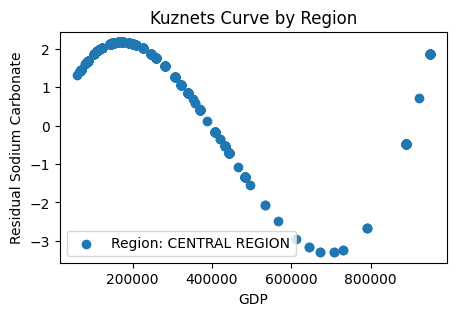

                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.056
Model:                                 OLS   Adj. R-squared:                  0.052
Method:                      Least Squares   F-statistic:                     13.61
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           1.81e-06
Time:                             07:14:21   Log-Likelihood:                -1107.8
No. Observations:                      462   AIC:                             2222.
Df Residuals:                          459   BIC:                             2234.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

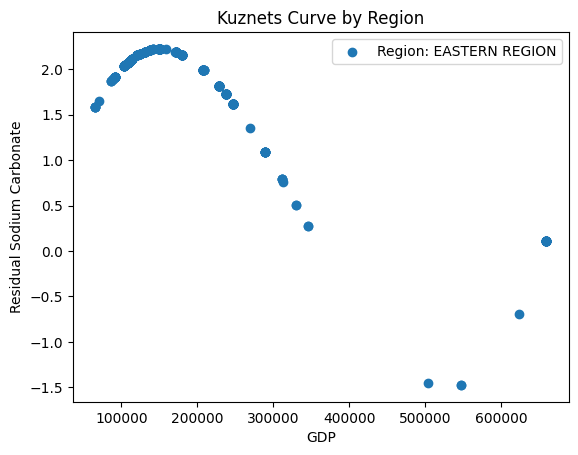

                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.089
Model:                                 OLS   Adj. R-squared:                  0.084
Method:                      Least Squares   F-statistic:                     17.39
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           6.20e-08
Time:                             07:14:22   Log-Likelihood:                -644.24
No. Observations:                      359   AIC:                             1294.
Df Residuals:                          356   BIC:                             1306.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

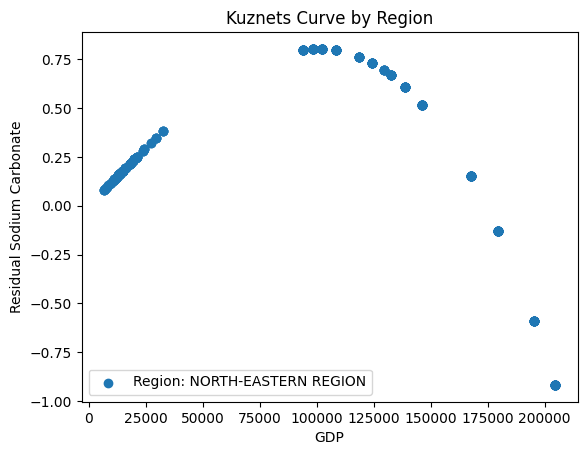

                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.129
Model:                                 OLS   Adj. R-squared:                  0.128
Method:                      Least Squares   F-statistic:                     98.72
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           1.04e-40
Time:                             07:14:22   Log-Likelihood:                -4502.5
No. Observations:                     1337   AIC:                             9011.
Df Residuals:                         1334   BIC:                             9027.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

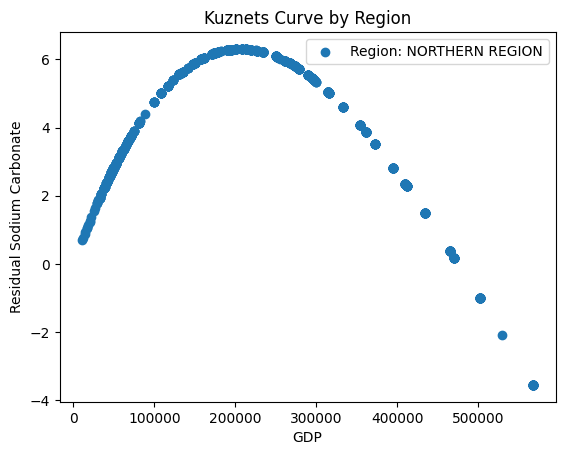

                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                      -0.005
Model:                                 OLS   Adj. R-squared:                 -0.009
Method:                      Least Squares   F-statistic:                    -1.377
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):               1.00
Time:                             07:14:22   Log-Likelihood:                -2562.5
No. Observations:                      556   AIC:                             5131.
Df Residuals:                          553   BIC:                             5144.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

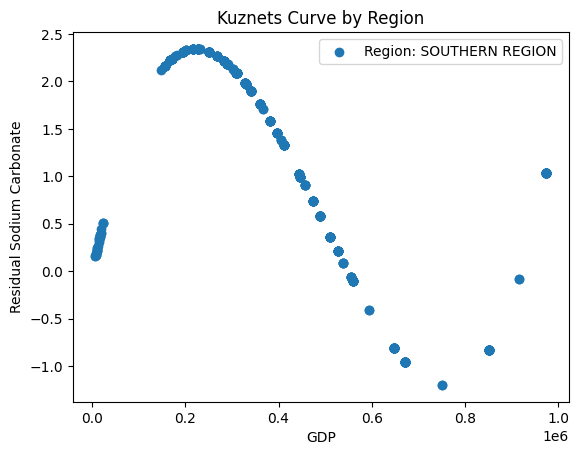

                               OLS Regression Results                              
Dep. Variable:     residualsodiumcarbonate   R-squared:                       0.188
Model:                                 OLS   Adj. R-squared:                  0.186
Method:                      Least Squares   F-statistic:                     103.1
Date:                     Mon, 29 Apr 2024   Prob (F-statistic):           5.32e-41
Time:                             07:14:23   Log-Likelihood:                -2975.1
No. Observations:                      894   AIC:                             5956.
Df Residuals:                          891   BIC:                             5971.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

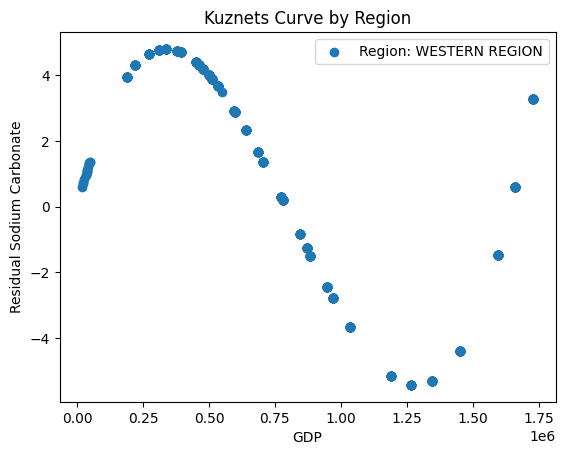

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


Region=[]
df1 = pd.read_csv('/content/cleaned_data_without_nonempty_gini.csv')
df1['gdp_square'] = df1['gdp']**2
df1['gdp_cube'] = df1['gdp']**3
for i in df1['state']:
    Region.append(state_to_region(i))
df1['Region']=Region

grouped_data = df1.groupby('Region')

plt.figure(figsize=(5, 3))



for region, group in grouped_data:
    model = sm.OLS(group['residualsodiumcarbonate'], sm.add_constant(group[['gdp', 'gdp_square', 'gdp_cube', 'Gini']]))
    results = model.fit()
    # print(group.describe)
    # print(group[['gdp', 'gdp_square', 'gdp_cube', 'Gini']].describe())
    print(results.summary())

    coef_gdp, coef_gdp_square, coef_gdp_cube, coef_gini = results.params[1:]
    intercept = results.params[0]

    predicted_y = intercept + coef_gdp * group['gdp'] + coef_gdp_square * group['gdp'] ** 2 + coef_gdp_cube * group['gdp'] ** 3 + coef_gini * group['Gini']

    plt.scatter(group['gdp'], predicted_y, label=f'Region: {region}')

    plt.xlabel('GDP')
    plt.ylabel('Residual Sodium Carbonate')
    plt.title('Kuznets Curve by Region')
    plt.legend()
    plt.show()


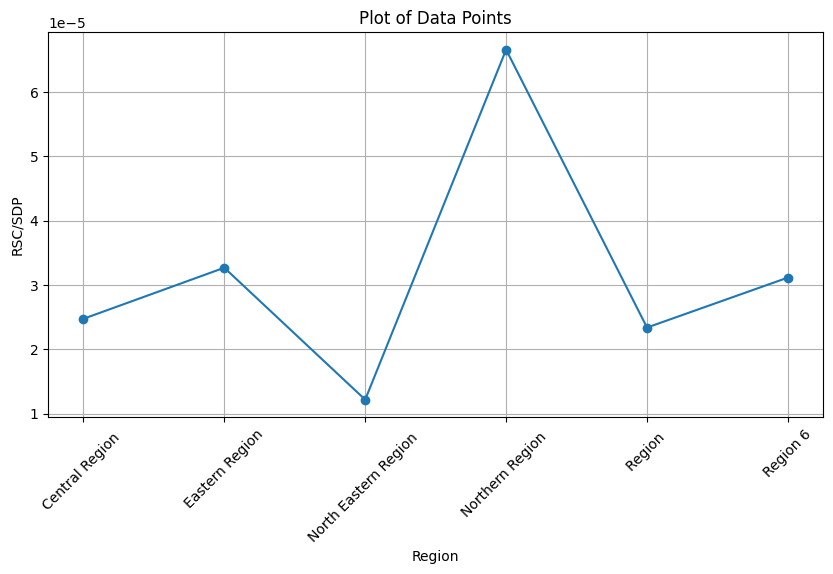

In [ ]:
import matplotlib.pyplot as plt

# Data
regions = ['Central Region ', 'Eastern Region', 'North Eastern Region ', 'Northern Region ', 'Region ', 'Region 6']
values = [
   2.474e-05,
   3.268e-05,
   1.217e-05,
   6.658e-05,
   2.338e-05,
   3.115e-05
]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(regions, values, marker='o', linestyle='-')  # Plot values with corresponding regions
plt.title('Plot of Data Points')
plt.xlabel('Region')
plt.ylabel('RSC/SDP')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
